In [5]:
from google.colab import drive
import os
import requests

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/pj/csv/nlp_project_final.csv")


In [25]:
df.sample(5)

,school,title,sentence_str,cleaned_text,sentence_length,sentence_lowered,tokenized_txt,lemmatized_str,gensim_tokenized
57761,rationalists,descartes_meditations,Whether all knowledge depends on the knowledge...,Whether all knowledge depends on the knowledge...,386,whether all knowledge depends on the knowledge...,"['whether', 'all', 'knowledge', 'depends', 'on...",whether all knowledge depend on the knowledge ...,"[whether, all, knowledge, depends, on, the, kn..."
188809,phenomenology,ponty_perception,"It is not without meaning, since behind it the...","It is not without meaning, since behind it the...",227,"it is not without meaning, since behind it the...","['it', 'is', 'not', 'without', 'meaning', 'sin...","it be not without meaning , since behind it th...","[it, is, not, without, meaning, since, behind,..."
3067,aristotle,volume_1,One thing belongs to another in itself both if...,One thing belongs to another in itself both if...,558,one thing belongs to another in itself both if...,"['one', 'thing', 'belongs', 'to', 'another', '...",one thing belong to another in itself both if ...,"[one, thing, belongs, to, another, in, itself,..."
36377,aristotle,volume_2,"So that the principle also, choice, changes vo...","So that the principle also, choice, changes vo...",56,"so that the principle also, choice, changes vo...","['so', 'that', 'the', 'principle', 'also', 'ch...","so that the principle also , choice , change v...","[so, that, the, principle, also, choice, chang..."
58940,rationalists,descartes_meditations,But I will just brieﬂy deal with those points ...,But I will just brieﬂy deal with those points ...,118,but i will just brieﬂy deal with those points ...,"['but', 'will', 'just', 'brieﬂy', 'deal', 'wit...",but I will just brieﬂy deal with those point t...,"[but, will, just, brieﬂy, deal, with, those, p..."


In [8]:
from gensim.utils import simple_preprocess


In [9]:
# using gensim's built-in tokenizer
df['gensim_tokenized'] = df['sentence_str'].map(lambda x: simple_preprocess(x.lower(),deacc=True,
                                                        max_len=100))

In [10]:
print(df.iloc[262231]['sentence_lowered'])
df['gensim_tokenized'][262231]


resolution passed by the congress of the league and 'amendments' thereto, two congresses.)


['resolution',
 'passed',
 'by',
 'the',
 'congress',
 'of',
 'the',
 'league',
 'and',
 'amendments',
 'thereto',
 'two',
 'congresses']

In [11]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser
from gensim.models import Word2Vec


In [12]:
def make_w2v(series, stopwords=[], size=200, window=5, min_count=5, workers=-1,
             epochs=20, lowercase=True, sg=0, seed=17, cbow_mean=1, alpha=0.025,
             sample=0.001, use_bigrams=True, threshold=10, bigram_min=5):
  # turn the series into a list, lower it, clean it
    sentences = [sentence for sentence in series]
    if lowercase:
      cleaned = []
      for sentence in sentences:
        cleaned_sentence = [word.lower() for word in sentence]
        cleaned_sentence = [word for word in sentence if word not in stopwords]
        cleaned.append(cleaned_sentence)
    else:
      cleaned = []
      for sentence in sentences:
        cleaned_sentence = [word for word in sentence]
        cleaned_sentence = [word for word in sentence if word not in stopwords]
        cleaned.append(cleaned_sentence)

  # incorporate bigrams
    if use_bigrams:
      bigram = Phrases(cleaned, min_count=bigram_min, threshold=threshold, delimiter=b' ')
      bigram_phraser = Phraser(bigram)
      tokens_list = []
      for sent in cleaned:
        tokens_ = bigram_phraser[sent]
        tokens_list.append(tokens_)
      cleaned = tokens_list
    else:
      cleaned = cleaned

  # build the model
    model = Word2Vec(cleaned, size=size, window=window,
                     min_count=min_count, workers=workers, seed=seed, sg=sg,
                     cbow_mean=cbow_mean, alpha=alpha, sample=sample)
    model.train(series, total_examples=model.corpus_count, epochs=epochs)
    model_wv = model.wv

  # clear it to avoid unwanted transference
    del model

    return model_wv

In [13]:
filtered_df = df[df['school'] == 'german_idealism']
sentences = filtered_df['gensim_tokenized'].tolist()
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=5)

try:
    print("Vector for 'truth':", model.wv['truth'])
except KeyError:
    print("Word 'truth' not in vocabulary.")


Vector for 'truth': [ 0.41248012 -0.32792735 -1.2328794  -0.76642066  0.66087365 -0.8182695
  0.2686788   0.50904745 -0.652382    0.32576618 -0.3206627  -0.2949651
  0.19200894 -0.24763754 -0.7076568   0.85698825 -0.6465881  -0.7362189
  0.5113      0.7372675  -0.7280635  -0.40597546  1.0773344  -0.14433108
  0.24288857  0.0739779  -1.2048391  -0.55160695  1.3992271  -0.37766784
 -0.29508048 -0.86665744  0.884142    0.58649266 -1.1624668   0.69027543
 -0.8950641   0.5445475  -0.3889338  -1.2948022  -1.1575755  -0.6611835
  0.13310158  1.0453349  -0.35123053  0.74680513 -0.05005893 -0.9281715
 -1.2950848  -0.4195261  -1.4021922  -0.17523263  0.2987698   0.90176696
  0.32913074 -1.2405683  -0.09107657 -0.68210816 -0.53214675 -0.22066784
 -0.29519796 -0.2917006   0.7366747   0.20079139 -0.90577567 -0.44849786
 -0.3432528  -0.6473994  -2.186127    1.9479153   0.02365311 -0.4358733
  0.7322243   1.7679244  -0.13945405  0.2086228   0.92506415 -0.278615
 -1.0608968  -0.27822196  1.1147151  -0

In [14]:
def test_w2v_pos_neg(model_wv, pairs_to_try):
    for positive, negative in pairs_to_try:
        print(f"Positive - {positive}\tNegative - {negative}")
        # Try to find the top similar words based on positive and negative lists
        try:
            results = model_wv.most_similar(positive=positive, negative=negative, topn=5)
            for word, similarity in results:
                print(f"- {word} ({similarity:.5f})")
        except KeyError as e:
            print(f"Word not in vocabulary: {e}")
        print()


In [15]:
pairs_to_try = [
    (['law', 'moral'], []),
    (['self', 'consciousness'], []),
    (['dialectic'], []),
    (['logic'], []),
]

test_w2v_pos_neg(model.wv, pairs_to_try)


Positive - ['law', 'moral']	Negative - []
- morality (0.74063)
- rule (0.73735)
- enforce (0.70143)
- disposition (0.69539)
- command (0.68192)

Positive - ['self', 'consciousness']	Negative - []
- activity (0.79960)
- negativity (0.78847)
- externality (0.78707)
- knowing (0.77583)
- identity (0.77080)

Positive - ['dialectic']	Negative - []
- antinomy (0.91496)
- deduction (0.90426)
- method (0.89665)
- analytic (0.87712)
- argument (0.87588)

Positive - ['logic']	Negative - []
- method (0.84316)
- dialectic (0.82924)
- philosophy (0.82759)
- deduction (0.81686)
- definition (0.81050)



In [16]:
cm = df[df['school'] == 'marxism']
sentences = cm['gensim_tokenized'].tolist()
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=5)

try:
    print("Vector for 'truth':", model.wv['truth'])
except KeyError:
    print("Word 'truth' not in vocabulary.")


Vector for 'truth': [-0.07881432  0.13375042 -0.0372619   0.16127095 -0.0778764  -0.1375468
  0.05017238  0.14443086 -0.11678752 -0.15153816 -0.10674559 -0.22926211
  0.1620775   0.05445489  0.04522372 -0.11919896  0.0467054  -0.23604254
 -0.01700647 -0.35021153  0.10379327  0.11157252  0.17064558 -0.02617225
  0.005971    0.16195671 -0.14717232 -0.01545282 -0.11136559 -0.12053388
  0.23203501  0.0974967  -0.04470291 -0.12886724  0.02750728  0.20215835
 -0.02770253 -0.02596173 -0.12002789 -0.16640155  0.01795369 -0.07500061
 -0.1136288   0.03510562  0.07991224 -0.21679884  0.00063395 -0.07022971
 -0.02181495  0.02953762  0.06365307 -0.18650347  0.07300065 -0.11799093
  0.02080358 -0.02990293  0.10725902  0.01993402 -0.19623064  0.05722107
 -0.00625403 -0.0183304   0.09963446  0.07495437 -0.08454343  0.20572361
  0.0176708   0.18002917 -0.15040356  0.11978106  0.02029219  0.07039782
  0.06115887  0.03584757  0.11592674  0.04016582 -0.08495233 -0.06645028
 -0.08372062  0.02640727 -0.0329

In [17]:
pairs_to_try=[(['material', 'conditions'], []),
              (['worker'], ['owner']),
              (['alienation', 'labor'], []),
              (['capital'], [])]

In [18]:
test_w2v_pos_neg(model.wv, pairs_to_try)


Positive - ['material', 'conditions']	Negative - []
- products (0.96930)
- exploitation (0.96601)
- wealth (0.96561)
- relations (0.96349)
- development (0.96327)

Positive - ['worker']	Negative - ['owner']
- tired (0.63273)
- laziness (0.62716)
- alive (0.60992)
- leeks (0.58288)
- factoryowners (0.57093)

Positive - ['alienation', 'labor']	Negative - []
- creation (0.98628)
- constituent (0.98427)
- domination (0.98413)
- corresponding (0.98197)
- formation (0.98119)

Positive - ['capital']	Negative - []
- money (0.94660)
- machinery (0.94044)
- circulation (0.92668)
- form (0.92307)
- magnitude (0.92080)



In [19]:
abai_gm = df[df['school'] == 'abai 45 words']
sentences_abai = abai_gm['gensim_tokenized'].tolist()
model = Word2Vec(sentences=sentences_abai, vector_size=100, window=5, min_count=1, workers=4, epochs=5)

try:
    print("Vector for 'truth':", model.wv['truth'])
except KeyError:
    print("Word 'truth' not in vocabulary.")


Vector for 'truth': [-0.0524576   0.15063262  0.02915417 -0.0101514   0.00351209 -0.3313749
  0.15221041  0.40694317 -0.19135599 -0.16766879 -0.02567996 -0.34685627
 -0.03398672  0.06707753  0.04245045 -0.11593723  0.13109803 -0.23369476
 -0.06648977 -0.34302974  0.14165607  0.00443504  0.17812294 -0.1750756
  0.05645106  0.06495834 -0.13794693 -0.01217024 -0.07401634  0.0979293
  0.20805147 -0.00382897  0.14985195 -0.29715124 -0.10357957  0.21102716
  0.05220563 -0.09968553 -0.13242939 -0.3493301  -0.00141623 -0.17399631
 -0.03607991  0.0164497   0.1836365  -0.08815361 -0.00409216 -0.0409106
  0.06733873  0.17005849  0.0979562  -0.22113076 -0.04919638 -0.0637387
 -0.14658998 -0.00188545  0.13615644  0.01685243 -0.1471895   0.13394645
 -0.02431436 -0.00572222  0.08818183  0.00256711 -0.20940517  0.24627523
 -0.01277159  0.22241488 -0.2767098   0.21757941 -0.06815164  0.21018565
  0.21756077 -0.06449361  0.18312271  0.05673009  0.04471811 -0.01067484
 -0.1168351   0.0741297  -0.20632954

In [20]:
import matplotlib.pyplot as plt
import nltk
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import random
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from gensim.models import Word2Vec
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

# Assuming 'sentences' is already defined as a list of lists of tokenized words
# If you're loading sentences here, ensure they are in the correct format

# Load your Word2Vec model or train a new one
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=1, workers=4, epochs=5)

# Prepare word vectors for t-SNE
words = list(model.wv.index_to_key)
word_vectors = np.array([model.wv[word] for word in words])

# Calculate frequency of each word
word_freq = {word: 0 for word in words}
for sentence in sentences:
    for word in sentence:
        if word in word_freq:
            word_freq[word] += 1

# Use t-SNE to reduce dimensions
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, verbose=1)
tsne_results = tsne.fit_transform(word_vectors)

# Create a DataFrame for visualization
df_tsne = pd.DataFrame(tsne_results, columns=['x', 'y'])
df_tsne['word'] = words
df_tsne['frequency'] = [word_freq[word] for word in words]

# Example of filtering for visualization
# Adjust the frequency threshold as needed for your dataset
top_words = {word: freq for word, freq in word_freq.items() if freq > 100}  # Example threshold
df_filtered = df_tsne[df_tsne['word'].isin(top_words.keys())]  # Ensure to filter using keys from the dictionary

# Plot with Plotly Express using the filtered DataFrame
fig = px.scatter(df_filtered, x='x', y='y', text='word',
                 size=np.sqrt(df_filtered['frequency']),  # Square root to scale size more gently
                 size_max=60, hover_name='word', title='Word Embedding Space using t-SNE')

fig.update_traces(marker=dict(opacity=0.6))
fig.update_layout(hovermode='closest')
fig.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18043 samples in 0.002s...
[t-SNE] Computed neighbors for 18043 samples in 6.871s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18043
[t-SNE] Computed conditional probabilities for sample 2000 / 18043
[t-SNE] Computed conditional probabilities for sample 3000 / 18043
[t-SNE] Computed conditional probabilities for sample 4000 / 18043
[t-SNE] Computed conditional probabilities for sample 5000 / 18043
[t-SNE] Computed conditional probabilities for sample 6000 / 18043
[t-SNE] Computed conditional probabilities for sample 7000 / 18043
[t-SNE] Computed conditional probabilities for sample 8000 / 18043
[t-SNE] Computed conditional probabilities for sample 9000 / 18043
[t-SNE] Computed conditional probabilities for sample 10000 / 18043
[t-SNE] Computed conditional probabilities for sample 11000 / 18043
[t-SNE] Computed conditional probabilities for sample 12000 / 18043
[t-SNE] Computed conditional probabilities for sam

below is trash still

In [22]:
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
stop_words = set(nltk.corpus.stopwords.words('english'))


In [58]:
bigram = Phrases(df['lemmatized_str'], min_count=5, threshold=10)
bigram_phraser = Phraser(bigram)
df['bigramed'] = df['lemmatized_str'].apply(lambda doc: bigram_phraser[doc])




In [59]:
grouped = df.groupby('school')['bigramed'].agg(lambda texts: [word for sublist in texts for word in sublist])


ValueError: 'color' kwarg must be a color or sequence of color specs.  For a sequence of values to be color-mapped, use the 'c' argument instead.

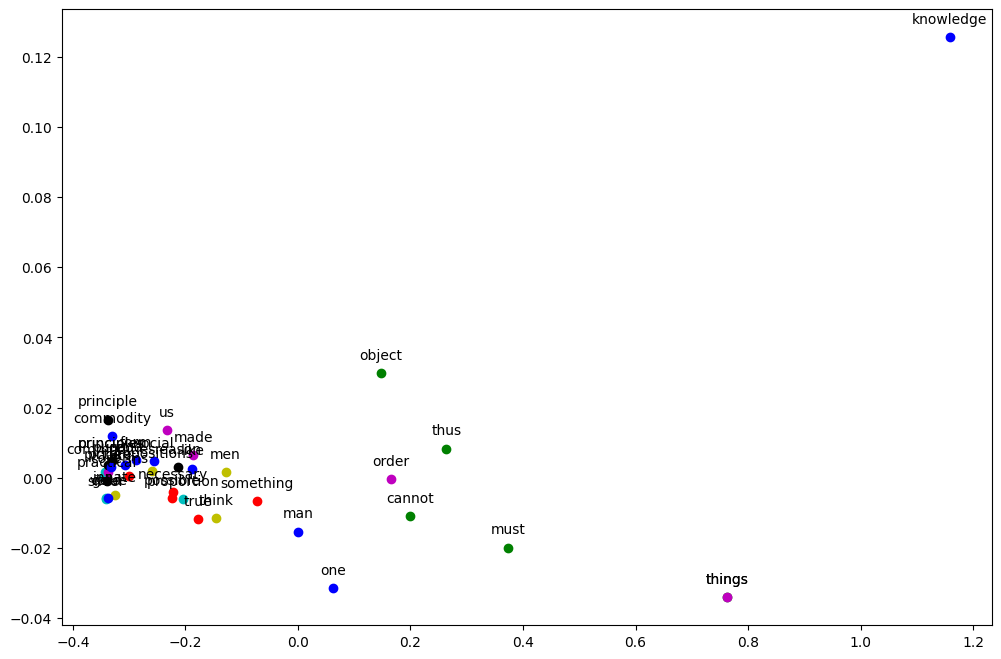

In [67]:


# Preprocessing the tokens
df['cleaned'] = df['gensim_tokenized'].apply(lambda tokens: [word.lower() for word in tokens if word.lower() not in stop_words])

# Aggregate and prepare data by school
grouped = df.groupby('school')['cleaned'].agg(lambda texts: [word for sublist in texts for word in sublist])

models = {}
top_words = {}
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','b','p','lb',]

for school, texts in grouped.items():
    if not texts:
        print(f"No data for school {school}, skipping model training.")
        continue

    # Ensure texts are lists of lists
    texts = [texts] if isinstance(texts, list) and all(isinstance(w, str) for w in texts) else [texts.split()]

    # Train the model
    model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=2, workers=4)
    models[school] = model

    # Extract the top words if the model's vocabulary is non-empty
    if len(model.wv.index_to_key) > 0:
        # Use the first word in the vocabulary if it exists as the base to find similar words
        base_word = model.wv.index_to_key[0]
        top_words[school] = [word for word, _ in model.wv.most_similar(base_word, topn=5)]
    else:
        top_words[school] = []
        print(f"No vocabulary for school {school}, skipping top words extraction.")

# Collect all unique top words for PCA
all_words = [word for words in top_words.values() for word in words]
word_vectors = np.array([model.wv[word] for school in top_words for word in top_words[school] if word in model.wv])

# Apply PCA
pca = PCA(n_components=2)
transformed_vectors = pca.fit_transform(word_vectors)

# Visualization
plt.figure(figsize=(12, 8))
for i, (school, words) in enumerate(top_words.items()):
    if not words:
        continue
    school_vectors = transformed_vectors[i*5:(i+1)*5, :]
    plt.scatter(school_vectors[:, 0], school_vectors[:, 1], label=school, color=colors[i % len(colors)])
    for j, word in enumerate(words):
        plt.annotate(word, (school_vectors[j, 0], school_vectors[j, 1]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Top Keywords by School in Word Embedding Space')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
models = {}
top_words = {}
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k','p','o','p']

In [62]:

for school, texts in grouped.items():
    model = Word2Vec(sentences=texts, vector_size=100, window=5, min_count=2, workers=4)
    models[school] = model
    top_words[school] = {word: model.wv.most_similar(word, topn=5) for word in model.wv.index_to_key}
print(top_words)

KeyboardInterrupt: 

In [30]:


# Flatten the list of words to get unique words across all models for PCA
all_words = set(word for words in top_words.values() for word, _ in words.items())
word_vectors = {word: models[school].wv[word] for school in top_words for word in top_words[school] if word in models[school].wv}

# Convert dictionary to array for PCA
words_list = list(word_vectors.keys())
vectors = np.array(list(word_vectors.values()))

# PCA transformation
pca = PCA(n_components=2)
transformed_vectors = pca.fit_transform(vectors)


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'p'

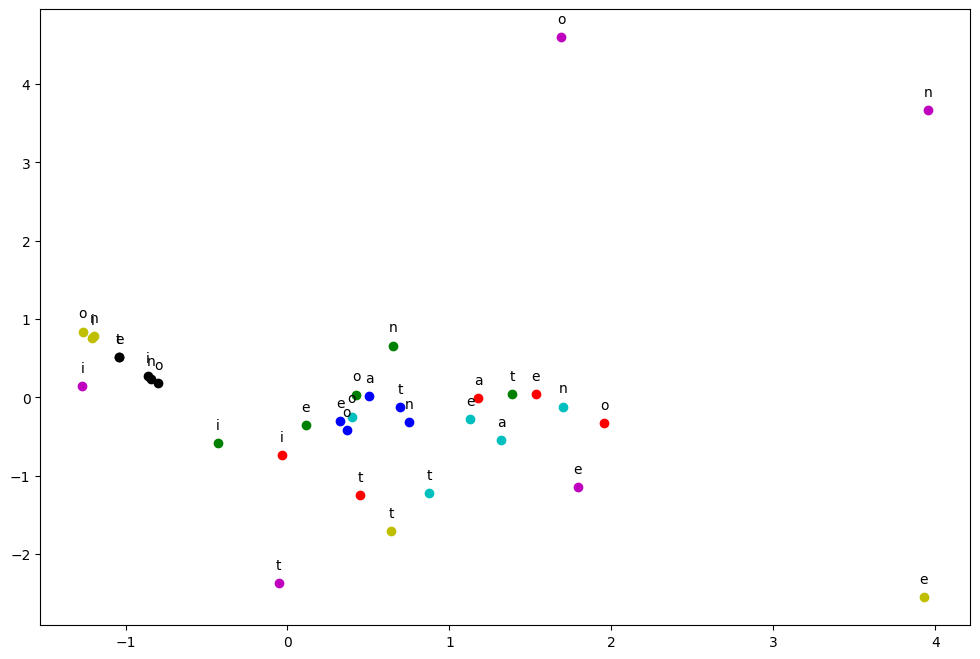

In [31]:
plt.figure(figsize=(12, 8))
for i, school in enumerate(top_words):
    start = i * 5
    end = start + 5
    plt.scatter(transformed_vectors[start:end, 0], transformed_vectors[start:end, 1], label=school, c=colors[i % len(colors)])
    for word, (x, y) in zip(top_words[school], transformed_vectors[start:end]):
        plt.annotate(word, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Top Keywords by School in Word Embedding Space')
plt.legend()
plt.grid(True)
plt.show()